In [1]:
import numpy as np

In [4]:
class LogisticRegression():
    def __init__(self,LR=0.01,n_iter = 1000):
        self.LR = LR
        self.n_iter = n_iter
        self.bias = None
        self.weight = None
    def _sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def fit(self,X,y):
        n_sample,n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            linear_ans = X @ self.weight + self.bias
            y_predict = self._sigmoid(linear_ans)

            δw = (1/n_sample)*(np.dot(X.T,y_predict-y))
            δb = (1/n_sample)*(np.sum(y_predict - y))

            self.weight -= δw*self.LR
            self.bias -= δb*self.LR

    def predict(self,X):
        linear_ans = np.dot(X,self.weight) + self.bias
        y_predict = self._sigmoid(linear_ans)
        y_predict_class = np.array([1 if i > 0.5 else 0 for i in y_predict])
        return y_predict_class
    



Accuracy: 0.9800


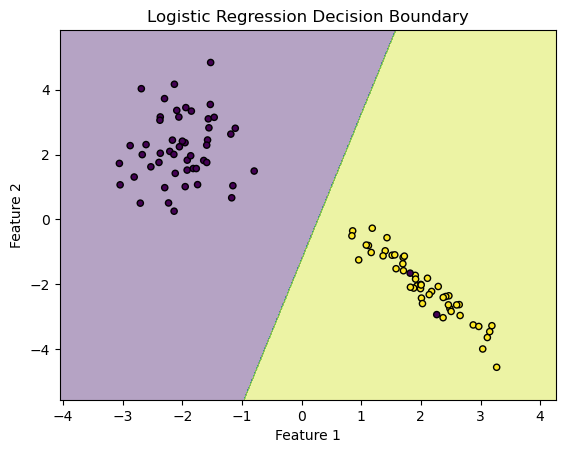

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# テスト用のデータセットを生成
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=2, random_state=7)

# ロジスティック回帰モデルのインスタンスを作成
model = LogisticRegression(LR=0.1, n_iter=1000)

# モデルを学習
model.fit(X, y)

# 新しいデータポイントに対する予測を行う
y_pred = model.predict(X)

# 予測精度を計算
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 決定境界を描画
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
